<a href="https://colab.research.google.com/github/liman71/TGU-internship/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%A0%D0%B0%D0%B7%D0%BD%D0%BE%D1%81%D0%B8%D0%BB%D0%B8%D0%BD_%D0%90__%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Не знаю правильно ли я поступаю, но решил сдать не "ИТОГ", а "ИТОГ с процессом". То есть не удалять все то, что в процессе работы посчитал не нужным или не значительным, или не смог решиться на варнииант хороший с моей точки зрения. Если, бы данные были не такими грязными, то работу давно сделал. Хочется привести датасет к идеальному виду, но для значительной автоматизации очистки не хватает знаний(а может и нельзя это сильно автоматизировать), а для ручной - нужно, ну очень, много времени! И "ходишь по кругу" - подчистил - посмотрел - еще почистил - подумал, хватит или еще? - еще надо - т.д.

# 1. Загрузка данных

In [ ]:
!gdown --id 10hBt6RAJoNj-jRBabEx7EmFobIWXLR66 #загрузка датасета

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=10hBt6RAJoNj-jRBabEx7EmFobIWXLR66
To: /content/region_roles_clean_n(26.05.22).xlsx
100% 3.25M/3.25M [00:00<00:00, 102MB/s]


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel("region_roles_clean_n(26.05.22).xlsx") #создание датафрейма из файла очищенного в EDA

In [ ]:
df.head(20)  #посмотрим на созданный датафрейм

,Unnamed: 0,name,region,key_skills_list,converted_to_rur_min,converted_to_rur_max,specializations_list,experience_new
0,1,тестировщик.net,Астраханская область,"['Git', 'SQL', 'Тестирование', 'C#', 'API']",21750.0,43500.0,"['Программирование, Разработка', 'Инженер', 'Т...",От 1 года до 3 лет
1,2,пентестер,Астраханская область,"['SQL', 'Linux', 'Информационная безопасность'...",NaN,NaN,"['Программирование, Разработка', 'Инженер', 'Т...",От 3 до 6 лет
2,3,ведущий специалист по информационным технологиям,Астраханская область,"['Пользователь ПК', 'Работа в команде', '1С: П...",22620.0,NaN,"['Компьютерная безопасность', 'Сетевые техноло...",Нет опыта
3,4,специалист по информационной безопасности,Астраханская область,"['MS Dos', 'Диагностика ПК', 'Компьютер', 'Раб...",20000.0,20000.0,"['Компьютерная безопасность', 'Сетевые техноло...",Нет опыта
4,5,специалист по информационной безопасности,Астраханская область,[],15000.0,20000.0,"['Компьютерная безопасность', 'Сетевые техноло...",Нет опыта
5,6,ведущий специалист по информационным технологиям,Астраханская область,"['Администрирование сетевого оборудования', 'З...",NaN,NaN,"['Компьютерная безопасность', 'Сетевые техноло...",От 3 до 6 лет
6,7,специалист по информационной безопасности,Астраханская область,"['Пользователь ПК', 'Работа в команде', 'Грамо...",23490.0,23490.0,"['Компьютерная безопасность', 'Сетевые техноло...",Нет опыта
7,8,оператор организационного сектора,Астраханская область,"['Пользователь ПК', 'Работа в команде', 'Грамо...",30000.0,30000.0,"['Компьютерная безопасность', 'Сетевые техноло...",Нет опыта
8,9,специалист по информационной безопасности,Астраханская область,[],15000.0,NaN,"['Компьютерная безопасность', 'Сетевые техноло...",От 3 до 6 лет
9,23,консультант sap bw/ bo,Астраханская область,"['SAP BI', 'SAP Business Objects', 'SAP BW', '...",NaN,NaN,"['Начальный уровень, Мало опыта', 'Программиро...",От 1 года до 3 лет


#2. Типы данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41962 entries, 0 to 41961
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            41962 non-null  int64  
 1   name                  41962 non-null  object 
 2   region                41962 non-null  object 
 3   key_skills_list       41962 non-null  object 
 4   converted_to_rur_min  17990 non-null  float64
 5   converted_to_rur_max  11200 non-null  float64
 6   specializations_list  41962 non-null  object 
 7   experience_new        41962 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.6+ MB


тип данных в датафрейме с разведочного анализа не изменился: количественные - зарплата,  категориальные - опыт работы, наименование вакансии, навыки и регион.

 # 3. И опять очистка и преобразование

опыт работы все таки порядковый тип данных по смыслу, поэтому преобразовал категориальный в порядковый.

In [ ]:
from pandas.api.types import CategoricalDtype
s = pd.Series(df['experience_new'])
cat_type = CategoricalDtype(categories=['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'], ordered=True)
df['experience_new'] = s.astype(cat_type)

Теперь опыт работы - порядковый тип данных.
Ниже второй способ, но он  - менее наглядный в таблице и при визуализации,
его так же пришлось использовать по необходимости, так как модуль статисики, несмотря на то, что данные порядковые, но представление не числовое не работает нормально.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41962 entries, 0 to 41961
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Unnamed: 0            41962 non-null  int64   
 1   name                  41962 non-null  object  
 2   region                41962 non-null  object  
 3   key_skills_list       41962 non-null  object  
 4   converted_to_rur_min  17990 non-null  float64 
 5   converted_to_rur_max  11200 non-null  float64 
 6   specializations_list  41962 non-null  object  
 7   experience_new        41962 non-null  category
dtypes: category(1), float64(2), int64(1), object(4)
memory usage: 2.3+ MB


In [ ]:
df['name'].value_counts()[:40] #без среза разноведмости наименований вакансий более 20000

программист 1с                               1746
системный администратор                      1721
менеджер проектов                             610
системный аналитик                            451
devops инженер                                370
специалист по информационной безопасности     363
аналитик                                      315
графический дизайнер                          301
инженер-программист                           288
инженер технической поддержки                 254
программист                                   246
frontend-разработчик                          242
java-разработчик                              233
руководитель проекта                          193
android пргограммист                          189
программист python                            155
php-программист                               148
продакт-менеджер                              139
ios разработчик                               127
it-специалист                                 105


In [ ]:
df.loc[df['name'].str.contains('ведущий программист 1с', na= False ),  'name'] = 'программист 1с'
df.loc[df['name'].str.contains('qa engineer|qa automation engineer', na= False ),  'name'] = 'тестировщик'
df.loc[df['name'].str.contains('программист php', na= False ),  'name'] = 'php-программист'
df.loc[df['name'].str.contains('web-разработчик', na= False ),  'name'] = 'web-программист'
df.loc[df['name'].str.contains('ведущий инженер-программист', na= False ),  'name'] = 'инженер-программист'
df.loc[df['name'].str.contains('инженер devops ', na= False ),  'name'] = 'devops инженер '

заменил несколько названий вакансий из наиболее часто встречающихся

In [ ]:
df['name'].value_counts()[:40]

программист 1с                                1890
системный администратор                       1721
тестировщик                                    922
менеджер проектов                              610
системный аналитик                             451
инженер-программист                            439
devops инженер                                 370
специалист по информационной безопасности      363
аналитик                                       315
графический дизайнер                           301
инженер технической поддержки                  254
php-программист                                250
программист                                    246
web-программист                                244
frontend-разработчик                           242
java-разработчик                               233
руководитель проекта                           193
android пргограммист                           189
программист python                             155
продакт-менеджер               

In [ ]:
df['key_skills_list'][1]

"['SQL', 'Linux', 'Информационная безопасность', 'Работа с базами данных', 'Базы данных']"

при сохранениии в excel список превращается в строку(хотя это визуально и не видно пока не выведесть отдельно), поэтому приходится эту строку преобразовать в список, что бы сработал explode

In [ ]:
df[['specializations_list', 'key_skills_list']] = df[['specializations_list', 'key_skills_list']].applymap(lambda x: eval(x))

In [ ]:
df['key_skills_list'][1] # теперь список снова список

['SQL',
 'Linux',
 'Информационная безопасность',
 'Работа с базами данных',
 'Базы данных']

In [ ]:
df_n = df[['name',  'key_skills_list', 'converted_to_rur_min', 'experience_new', 'region']] #создадим новый датафрейм, оставив необходимые колонки

здесь надо было бы заменить часть имен колонок на более котроткие, но не сделал сразу, а потом не стал - пришлось бы все переделывать

In [ ]:
top_name = df_n['name'].value_counts()[:30] #хотел взять сколько топ вакансий( пробовал от 20-4000) и с ними работать, в итоге не стал обрезать(все таки обрезал)
top_name

программист 1с                               1890
системный администратор                      1721
тестировщик                                   922
менеджер проектов                             610
системный аналитик                            451
инженер-программист                           439
devops инженер                                370
специалист по информационной безопасности     363
аналитик                                      315
графический дизайнер                          301
инженер технической поддержки                 254
php-программист                               250
программист                                   246
web-программист                               244
frontend-разработчик                          242
java-разработчик                              233
руководитель проекта                          193
android пргограммист                          189
программист python                            155
продакт-менеджер                              139


In [ ]:
df_top_name = df_n.loc[df['name'].isin(top_name.index)]
df_top_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10457 entries, 3 to 41959
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   name                  10457 non-null  object  
 1   key_skills_list       10457 non-null  object  
 2   converted_to_rur_min  5247 non-null   float64 
 3   experience_new        10457 non-null  category
 4   region                10457 non-null  object  
dtypes: category(1), float64(1), object(3)
memory usage: 418.9+ KB


In [ ]:
df_n.info() # фактически df_n  и df_top_name(без среза) одно и то же- сравнивал и пытался понять насколько результаты будут отличаться

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41962 entries, 0 to 41961
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   name                  41962 non-null  object  
 1   key_skills_list       41962 non-null  object  
 2   converted_to_rur_min  17990 non-null  float64 
 3   experience_new        41962 non-null  category
 4   region                41962 non-null  object  
dtypes: category(1), float64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
df_skill_ = df_top_name.explode('key_skills_list')


In [ ]:
df_skill_.head(30)

,name,key_skills_list,converted_to_rur_min,experience_new,region
3,специалист по информационной безопасности,MS Dos,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Диагностика ПК,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Компьютер,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Работа в условиях многозадачности,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Работа с компьютером,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Умение работать в условиях многозадачности,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,"Коммуникабельность, ответственность",20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Организация конференций,20000.0,Нет опыта,Астраханская область
4,специалист по информационной безопасности,NaN,15000.0,Нет опыта,Астраханская область
6,специалист по информационной безопасности,Пользователь ПК,23490.0,Нет опыта,Астраханская область


In [ ]:
sr_skil_top=df_skill_['key_skills_list'].value_counts()[:30] # срез по навыкам(тоже пробовал разные "боясь потерять данные")

In [ ]:
sr_skil_top.to_frame()

,key_skills_list
SQL,1561
1С программирование,1393
Linux,1287
Git,1111
1С: Предприятие 8,1052
Python,724
Java,651
Работа в команде,633
Английский язык,624
Управление проектами,620


снова на до "чистить" данные. наверное организаторы курса хотели показать, что работа Аналитика, это в основном, не анализ данных, построение моделей и поиск инсайдов в данных, а их очистка и преобразование. причем практически в ручном режиме.

In [ ]:
skills_del = [ 'Английский язык', 'ООП', 'Работа в команде', 'Управление проектами', 'Грамотная речь', 'Аналитическое мышление', 'Пользователь ПК', 'Информационные технологии', 'Информационная безопасность', 'Организаторские навыки',
              'Деловая коммуникация', 'Настройка ПК',	'Работа с большим объемом информации', 'Ведение переговоров', 'Деловая переписка', 'Деловое общение', 'Грамотность', 'Настройка ПО', 'Креативность', 'Разработка технических заданий',
              'Техническая поддержка', 'Обучение и развитие', 'Администрирование', 'Работа в условиях многозадачности', 'Ориентация на результат', 'Управление персоналом', 'Удаленная работа', 'Подбор персонала', 'Системное мышление',
              'Постановка задач разработчикам', 'Сборка ПК', 'Многозадачность', 'Опытный пользователь ПК',  'Офисная техника', 'Умение работать в команде', 'Клиентоориентированность', 'Планирование карьеры',
              'Проектная документация', 'Технические средства информационной защиты', 'Работа с оргтехникой', 'Умение работать в команде', 'Клиентоориентированность', 'Заключение договоров', 'Планирование карьеры',
              'Проектная документация', 'Руководство коллективом', 'Windows Os', 'Анализ рынка',  'Активные продажи' 'Разработка нового продукта', 'Ответственность', 'Копирайтинг', 'Моделирование бизнес процессов',
              'Мобильность', 'Навыки презентации', 'Техническая документация', 'Средства криптографической защиты информации', 'Ведение групп в социальных сетях', 'Написание текстов', 'Навыки продаж', 'Точность и внимательность к деталям',
              'Системы видеонаблюдения', 'Управление временем', 'Консультирование', 'Мотивация персонала', 'Организация мероприятий', 'Бухгалтерский учет', 'Наполнение контентом', 'Коммуникабельность', 'Умение работать в коллективе', 'Управление продуктом',
              'Умение работать в условиях многозадачности', 'Телефонные переговоры', 'Высшее образование', 'Проведение презентаций', 'Управление командой',  'Разработка инструкций', 'Поиск информации в интернет', 'Подготовка презентаций',
              'Продвинутый пользователь ПК', 'Обучение персонала', 'Управление отношениями с клиентами', 'Поиск и привлечение клиентов', 'Консультирование клиентов', 'Строительство', 'Активные продажи', 'Умение принимать решения','Грамотная устная и письменная речь',
              'Коммуникабельность, ответственность', 'B2B Продажи', 'Развитие продаж', 'Консультирование клиентов по телефону','Ремонт ПК', 'Техническое обслуживание', 'Внедрение систем информационной безопасности', 'Творческое мышление', 'Расстановка приоритетов'
              'Стрессоустойчивость', 'Уверенный пользователь ПК', 'Организационные навыки', 'Продвижение в социальных группах', 'Работа с людьми', 'Работа с базами данных', 'Базы данных', 'СУБД', 'Cистемы управления базами данных', 'Настройка сетевых подключений',
              'Тестирование',  'Администрирование сетевого оборудования', 'Бизнес-анализ', 'Системный анализ', 'Анализ данных', 'Функциональное тестирование', 'Администрирование серверов Windows', 'Администрирование серверов Linux', 'Проведение тестирований',
              'Аналитика', 'Windows', '1С: Документооборот',  '1С: Зарплата и управление персоналом', '1С: Управление Торговлей',  '1С: Бухгалтерия', '1С: Комплексная автоматизация',  '1C: Бухгалтерия', 'Обновление конфигурации', '1C: Предприятие',
              'Тестирование пользовательского интерфейса', 'Разработка ПО', 'Аналитические исследования', 'Разработка нового продукта', '1С: Предприятие 8', 'Windows 7']

df1 = df_skill_.loc[~df_skill_['key_skills_list'].isin(skills_del)]

In [ ]:
df1.loc[df1['key_skills_list'].str.contains('С#', na= False ),  'key_skills_list'] = 'C#'
df1.loc[df1['key_skills_list'].str.contains('JS|Java Script', na= False ),  'key_skills_list'] = 'JavaScript'
#df1.loc[df1['key_skills_list'].str.contains('Windows 7|MS Windows|Windows Xp', na= False ),  'key_skills_list'] = 'Windows'
#df1.loc[df1['key_skills_list'].str.contains('1С: Предприятие 8|1С: Управление Производственным Предприятием|1С: Управление предприятием|1С: Предприятие', na= False ),  'key_skills_list'] = '1C: Предприятие'
#df1.loc[df1['key_skills_list'].str.contains('MS SQL|1C:|ERP-системы на базе 1С|Знание 1С', na= False ),  'key_skills_list'] = '1С:приложение'
df1.loc[df1['key_skills_list'].str.contains('Access|Microsoft Access', na= False ),  'key_skills_list'] = 'MS Access	'
#df1.loc[df1['key_skills_list'].str.contains('Аналитика|Аналитические исследования|Сбор и анализ информации|Power BI|Tableau|Google Analytics|Data Analysis|Яндекс.Метрика|BI', na= False ),  'key_skills_list'] = 'Анализ данных'
#df1.loc[df1['key_skills_list'].str.contains('Adobe Photoshop|CorelDRAW|Adobe Illustrator|Adobe InDesign|Графика', na= False ),  'key_skills_list'] = 'Графические редакторы'
#df1.loc[df1['key_skills_list'].str.contains('AutoCAD|3ds Max|Blender 3D|Autodesk Maya', na= False ),  'key_skills_list'] = '3D Моделирование'
df1.loc[df1['key_skills_list'].str.contains('UX|UI|Веб-дизайн|Web Design|UI/UX', na= False ),  'key_skills_list'] = 'Web-дизайн'
#f1.loc[df1['key_skills_list'].str.contains('Настройка сетевых подключений|Администрирование сетевого оборудования|Администрирование серверов Windows|Администрирование серверов Linux|Сетевые технологии|Настройка серверов',
                                            #na= False ),  'key_skills_list'] = 'системное администрирование'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


не стал убирать закомменированные строки по причине указанной вначале.

In [ ]:
df1.head(100)

,name,key_skills_list,converted_to_rur_min,experience_new,region
3,специалист по информационной безопасности,MS Dos,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Диагностика ПК,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Компьютер,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Работа с компьютером,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Организация конференций,20000.0,Нет опыта,Астраханская область
...,...,...,...,...,...
122,графический дизайнер,Высокая скорость печати,NaN,От 1 года до 3 лет,Хабаровский край
122,графический дизайнер,CorelDRAW Graphics Suite,NaN,От 1 года до 3 лет,Хабаровский край
124,графический дизайнер,Adobe Photoshop,20000.0,От 1 года до 3 лет,Хабаровский край
124,графический дизайнер,Adobe Illustrator,20000.0,От 1 года до 3 лет,Хабаровский край


In [ ]:
df1[df1['converted_to_rur_min']<5000]

,name,key_skills_list,converted_to_rur_min,experience_new,region
25788,системный администратор,NaN,70.00,От 3 до 6 лет,Самарская область
35418,системный администратор,TCP/IP,69.60,Нет опыта,Московская область
35418,системный администратор,Linux,69.60,Нет опыта,Московская область
38039,web-программист,NaN,1000.00,От 1 года до 3 лет,Кировская область
39338,программист python,NaN,91.35,От 1 года до 3 лет,Новосибирская область
40484,системный администратор,Настройка серверов,30.00,От 1 года до 3 лет,Челябинская область
40484,системный администратор,Администрирование серверов,30.00,От 1 года до 3 лет,Челябинская область
40484,системный администратор,Mikrotik,30.00,От 1 года до 3 лет,Челябинская область


In [ ]:
del_min = df1['converted_to_rur_min']<5000
df1 = df1.loc[~df1['converted_to_rur_min'].isin(del_min)]
#df1 = df_skill_.loc[~df_skill_['key_skills_list'].isin(del)]

In [ ]:
df1 = df1.drop(df1.loc[df1['converted_to_rur_min']<5000].index)

In [ ]:
df1[df1['converted_to_rur_min']<5000]

,name,key_skills_list,converted_to_rur_min,experience_new,region


In [ ]:
sk_l=df1['key_skills_list'].value_counts()
sk_l.to_frame()

,key_skills_list
SQL,1561
1С программирование,1393
Linux,1286
Git,1111
JavaScript,891
...,...
Владение оргтехникой,1
"уверенное пользование ПК, знание программ MS Office",1
Администрирование систем виртуализации VMware ESXI,1
ЛВС,1


In [ ]:
name_d = df1[df1['key_skills_list']=='C++']

In [ ]:
name_d

,name,key_skills_list,converted_to_rur_min,experience_new,region
52,программист 1с,C++,69600.0,От 1 года до 3 лет,Астраханская область
462,программист,C++,43500.0,От 1 года до 3 лет,Рязанская область
466,программист 1с,C++,NaN,От 3 до 6 лет,Рязанская область
713,инженер-программист,C++,NaN,Нет опыта,Нижегородская область
1309,инженер-программист,C++,87000.0,От 1 года до 3 лет,Нижегородская область
...,...,...,...,...,...
41252,инженер-программист,C++,55000.0,От 1 года до 3 лет,Омская область
41264,программист,C++,NaN,От 3 до 6 лет,Омская область
41275,программист,C++,NaN,От 1 года до 3 лет,Омская область
41312,инженер-программист,C++,NaN,От 1 года до 3 лет,Омская область


In [ ]:
	df_n[df_n['name']=='программист с++']

,name,key_skills_list,converted_to_rur_min,experience_new,region
1255,программист с++,[C++],NaN,От 1 года до 3 лет,Нижегородская область
1293,программист с++,"[C++, Qt, STL, MySQL, ООП]",78300.0,От 1 года до 3 лет,Нижегородская область
1317,программист с++,[C++],NaN,От 3 до 6 лет,Нижегородская область
1375,программист с++,"[Git, Linux, ООП, C++, СУБД]",NaN,От 1 года до 3 лет,Нижегородская область
1395,программист с++,"[C#, .NET Framework, Разработка нового продукт...",NaN,От 3 до 6 лет,Нижегородская область
2021,программист с++,"[C++, Qt, Linux]",NaN,От 1 года до 3 лет,Тверская область
2097,программист с++,"[C++, OpenCV, Qt]",NaN,От 3 до 6 лет,Республика Мордовия
2557,программист с++,"[C++, Qt, Git, MS Visual Studio, PostgreSQL, L...",52200.0,От 1 года до 3 лет,Ставропольский край
3778,программист с++,"[OpenGL, Scrum, C++, Разработка компьютерных Игр]",NaN,От 3 до 6 лет,Ростовская область
5602,программист с++,"[C++, Linux, Boost]",NaN,От 3 до 6 лет,Республика Башкортостан


In [ ]:
df1.head()

,name,key_skills_list,converted_to_rur_min,experience_new,region
3,специалист по информационной безопасности,MS Dos,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Диагностика ПК,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Компьютер,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Работа с компьютером,20000.0,Нет опыта,Астраханская область
3,специалист по информационной безопасности,Организация конференций,20000.0,Нет опыта,Астраханская область


# 4. Визуализация данных

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

#pd.options.display.max_rows = 40
plt.style.use('seaborn')

params = {
          'axes.titlesize': 15,
          'xtick.labelsize': 12,
          'axes.labelsize': 14
          }
plt.rcParams.update(params)


In [ ]:
sk_l=df1['key_skills_list'].value_counts()[0:30]
sk_l.to_frame()

,key_skills_list
SQL,1561
1С программирование,1393
Linux,1286
Git,1111
JavaScript,891
Python,724
Java,651
PostgreSQL,536
MySQL,478
Atlassian Jira,474


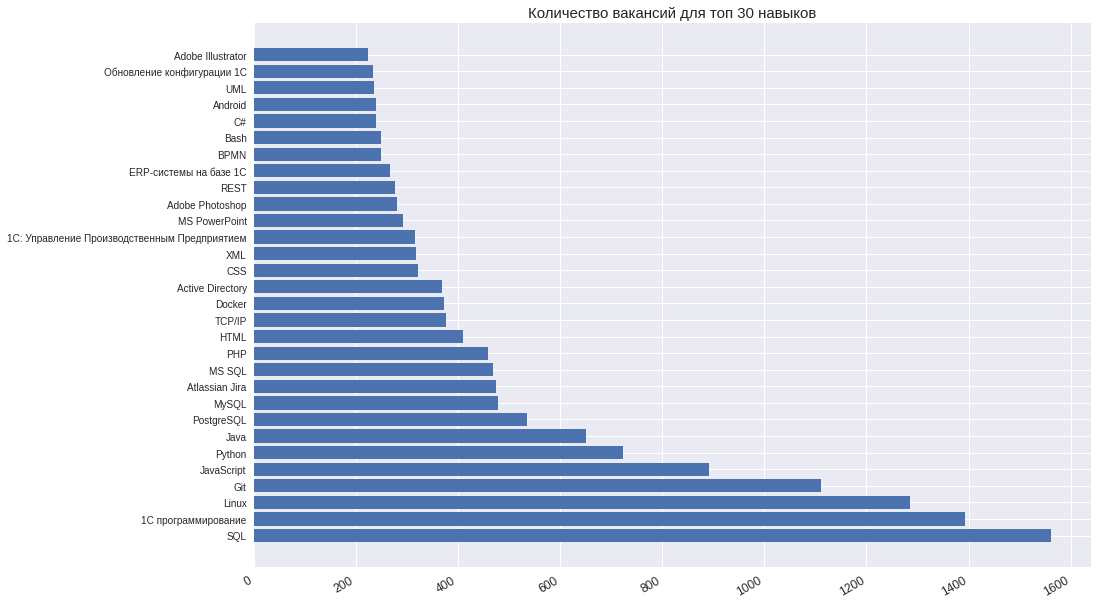

In [ ]:
fig = plt.figure(figsize = (15, 10))
plt.title('Количество вакансий для топ 30 навыков')
plt.xticks(rotation=30, ha = 'right')

plt.barh(sk_l.index, sk_l.values)
plt.show()

In [ ]:
sk_l_top=df1['key_skills_list'].value_counts()[:30]
df_sk_l_top = df1.loc[df1['key_skills_list'].isin(sk_l_top.index)] # датафрейм с топ 30 навыков
df_sk_l_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15298 entries, 6 to 41959
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   name                  15298 non-null  object  
 1   key_skills_list       15298 non-null  object  
 2   converted_to_rur_min  6278 non-null   float64 
 3   experience_new        15298 non-null  category
 4   region                15298 non-null  object  
dtypes: category(1), float64(1), object(3)
memory usage: 612.7+ KB


In [ ]:
df_sk_l_top

,name,key_skills_list,converted_to_rur_min,experience_new,region
6,специалист по информационной безопасности,MS PowerPoint,23490.0,Нет опыта,Астраханская область
18,руководитель проекта,MS PowerPoint,NaN,От 1 года до 3 лет,Астраханская область
51,инженер-программист,C#,NaN,От 1 года до 3 лет,Астраханская область
51,инженер-программист,JavaScript,NaN,От 1 года до 3 лет,Астраханская область
51,инженер-программист,Java,NaN,От 1 года до 3 лет,Астраханская область
...,...,...,...,...,...
41958,программист 1с,1С программирование,NaN,От 1 года до 3 лет,Тульская область
41958,программист 1с,Обновление конфигурации 1С,NaN,От 1 года до 3 лет,Тульская область
41958,программист 1с,MS SQL,NaN,От 1 года до 3 лет,Тульская область
41958,программист 1с,ERP-системы на базе 1С,NaN,От 1 года до 3 лет,Тульская область


In [ ]:
top_n = df_sk_l_top['name'].value_counts()[:30] # количество топ-30 наименований вакансих с топ-30 навыков
top_n

программист 1с                               2666
тестировщик                                  2169
системный администратор                      1264
системный аналитик                           1119
devops инженер                               1110
php-программист                               904
web-программист                               842
frontend-разработчик                          645
java-разработчик                              610
графический дизайнер                          485
инженер-программист                           444
программист python                            428
программист                                   424
android пргограммист                          395
аналитик                                      329
программист c#                                223
системный администратор linux                 214
менеджер проектов                             182
инженер технической поддержки                 158
специалист по информационной безопасности     128


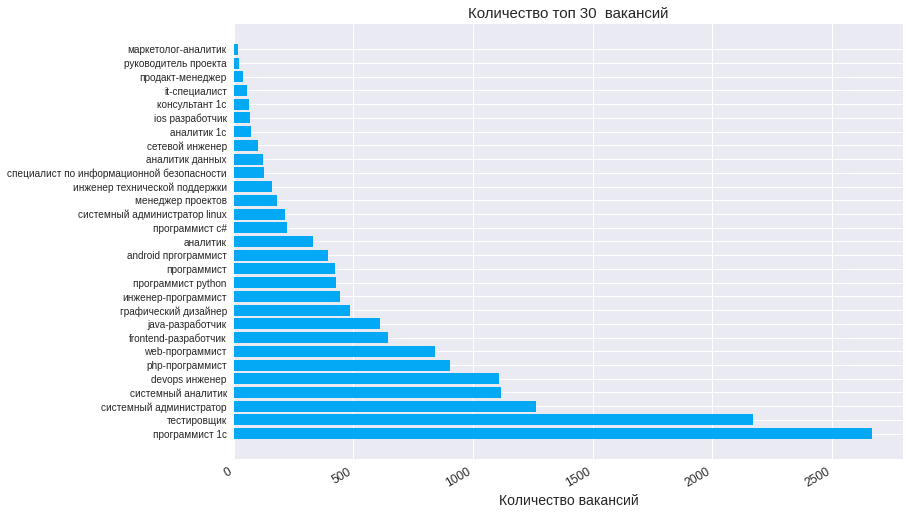

In [ ]:
fig = plt.figure(figsize = (12, 8))
plt.xlabel('Количество вакансий')
plt.title('Количество топ 30  вакансий')
plt.xticks(rotation=30, ha = 'right')
plt.barh(top_n.index, top_n.values,color='#03A9F4')
plt.show()

In [ ]:
df2=df_sk_l_top.groupby('key_skills_list')[['converted_to_rur_min']].mean().round(0)
df2 = df2.sort_values('converted_to_rur_min')

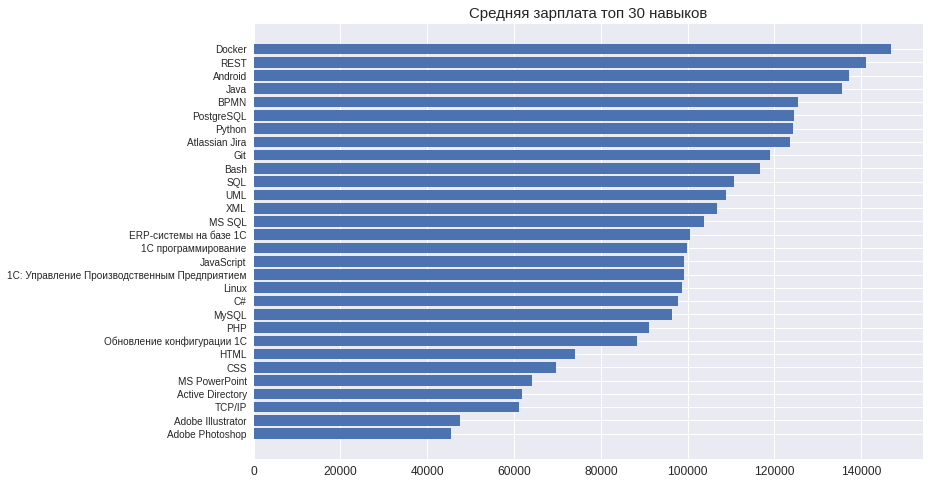

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
x=np.arange(len(df2.index))
ax.barh(x, df2['converted_to_rur_min'])
ax.set_title('Средняя зарплата топ 30 навыков')
ax.set_yticks(x)
ax.set_yticklabels(df2.index)
plt.show()

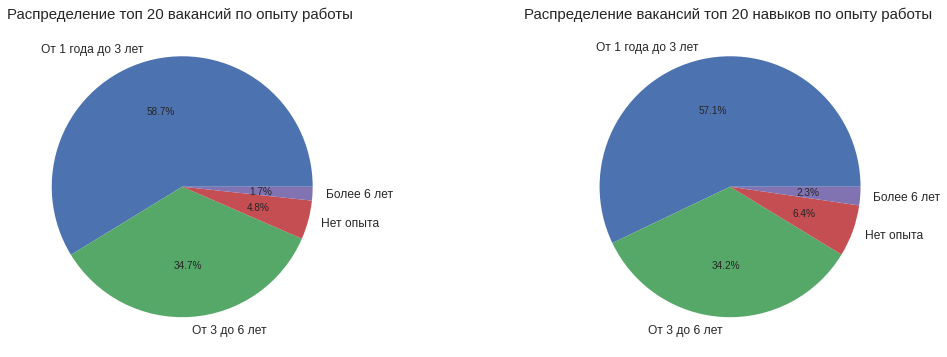

In [ ]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(18, 6)
)

type_counts1 = df_sk_l_top['experience_new'].value_counts(normalize=True, dropna=False)
type_counts2 = df1['experience_new'].value_counts(normalize=True, dropna=False)
ax1.pie(type_counts1.values, labels = type_counts1.index, autopct='%1.1f%%')

ax2.pie(type_counts2.values, labels = type_counts2.index, autopct='%1.1f%%')

ax1.set_title('Распределение топ 20 вакансий по опыту работы ')
#ax1.set_xlabel('топ 20 вакансий')

ax2.set_title('Распределение вакансий топ 20 навыков по опыту работы ')
#ax2.set_xlabel('топ 20 навыков')
plt.show()

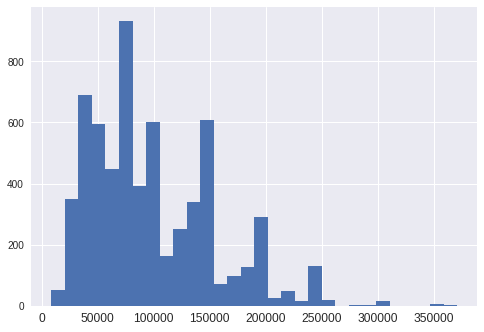

In [ ]:
df_sk_l_top['converted_to_rur_min'].hist(bins=30)

In [ ]:
df3=df_sk_l_top.groupby('name')[['converted_to_rur_min']].mean().round(0)
df3 = df3.sort_values('converted_to_rur_min')

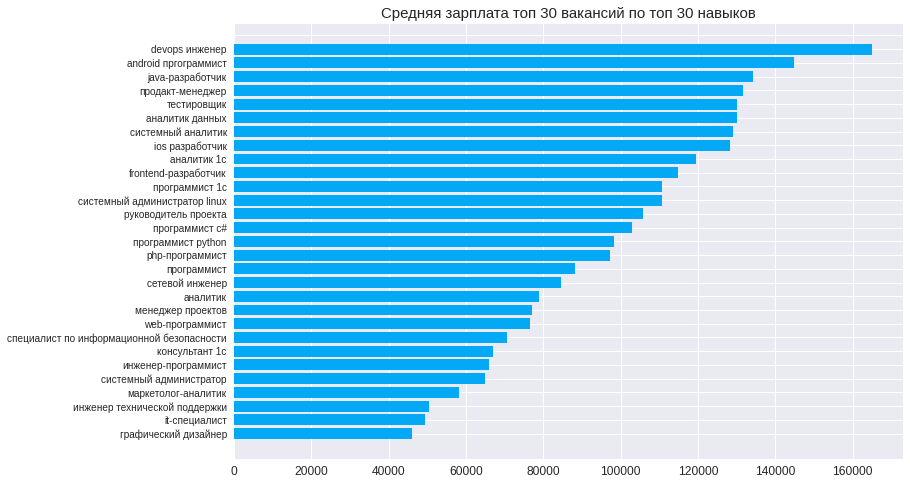

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.barh(np.arange(len(df3.index)), df3['converted_to_rur_min'],color='#03A9F4')
ax.set_title('Средняя зарплата топ 30 вакансий по топ 30 навыков')
ax.set_yticks(x)
ax.set_yticklabels(df3.index)
plt.show()


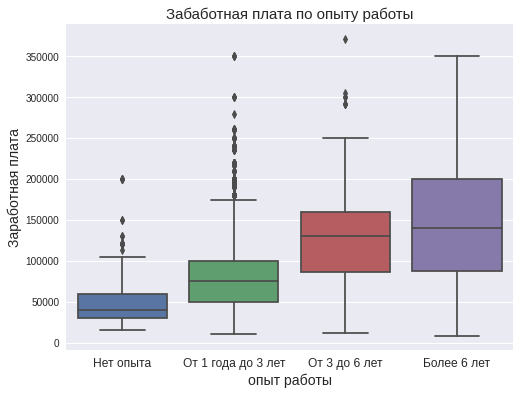

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='experience_new', y='converted_to_rur_min', data=df_sk_l_top)
ax.set_title('Забаботная плата по опыту работы')
#ax.set_yticks(x)
plt.ylabel('Заработная плата')
plt.xlabel('опыт работы')
plt.show()

In [ ]:
from pandas._libs.hashtable import value_count
max = df_sk_l_top[df_sk_l_top['converted_to_rur_min']>300000]
max

,name,key_skills_list,converted_to_rur_min,experience_new,region
491,инженер-программист,PHP,350000.0,Более 6 лет,Рязанская область
491,инженер-программист,MySQL,350000.0,Более 6 лет,Рязанская область
491,инженер-программист,Git,350000.0,Более 6 лет,Рязанская область
491,инженер-программист,Linux,350000.0,Более 6 лет,Рязанская область
18029,программист c#,C#,371000.0,От 3 до 6 лет,Москва
18319,android пргограммист,Android,304500.0,От 3 до 6 лет,Москва
41193,java-разработчик,SQL,350000.0,От 1 года до 3 лет,Омская область
41193,java-разработчик,MySQL,350000.0,От 1 года до 3 лет,Омская область
41193,java-разработчик,Java,350000.0,От 1 года до 3 лет,Омская область


#5. Гипотеза о виде распределения


Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной
совокупности, уровень значимости полагаем равным 0,05

In [ ]:
df_sk_l_top[['converted_to_rur_min']].skew() # коэффициент асимметрии

converted_to_rur_min    0.95631
dtype: float64

In [ ]:
df_sk_l_top[['converted_to_rur_min']].kurtosis() # коэффициент эксцесса

converted_to_rur_min    0.655599
dtype: float64

Для количественных показателей. Критерий Шапиро-Уилка, но он работает с выборками до 5000 наблюдений

In [ ]:
stats.shapiro(df_sk_l_top['converted_to_rur_min'].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9259471893310547, pvalue=0.0)

Тест д'Агостино

In [ ]:
stats.normaltest(df_sk_l_top['converted_to_rur_min'].dropna())

NormaltestResult(statistic=762.0098029197196, pvalue=3.4015253968802275e-166)

pvalue=0.0 в обоих случаях менее 0,05 следовательно НО отклоняется и распределение не является нормальным

# В зависимости от типов данных, оценим связь между показателями.

Из описанных выше типов данных они
 в основном категориальные(не завимые и с количеством групп более 2),
 "опыт" - порядковый(так же с количеством групп более 2) и
 заработная плата - количественный не параметрический.

 Поэтому критерии сравнения групп : для ЗП и опыта работы с другими категориальными -  Краскалла-Уоллеса
 мужду категориальными - таблица сопряженности и ХИ2
   
   Уровень значимости во свех слу


In [ ]:
df_sk_l_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15298 entries, 6 to 41959
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   name                  15298 non-null  object  
 1   key_skills_list       15298 non-null  object  
 2   converted_to_rur_min  6278 non-null   float64 
 3   experience_new        15298 non-null  category
 4   region                15298 non-null  object  
dtypes: category(1), float64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
df_sk_l_top.to_excel("/region_roles_clean_nn(26.05.22).xlsx")
df_sk_l_top

,name,key_skills_list,converted_to_rur_min,experience_new,region
6,специалист по информационной безопасности,MS PowerPoint,23490.0,Нет опыта,Астраханская область
18,руководитель проекта,MS PowerPoint,NaN,От 1 года до 3 лет,Астраханская область
51,инженер-программист,C#,NaN,От 1 года до 3 лет,Астраханская область
51,инженер-программист,JavaScript,NaN,От 1 года до 3 лет,Астраханская область
51,инженер-программист,Java,NaN,От 1 года до 3 лет,Астраханская область
...,...,...,...,...,...
41958,программист 1с,1С программирование,NaN,От 1 года до 3 лет,Тульская область
41958,программист 1с,Обновление конфигурации 1С,NaN,От 1 года до 3 лет,Тульская область
41958,программист 1с,MS SQL,NaN,От 1 года до 3 лет,Тульская область
41958,программист 1с,ERP-системы на базе 1С,NaN,От 1 года до 3 лет,Тульская область


In [ ]:
df_sk_l_top['experience_new'] = df_sk_l_top['experience_new'].astype(object)
df_sk_l_top.loc[df_sk_l_top['experience_new'].str.contains('Нет опыта', na= False ),  'experience_new'] = '0'
df_sk_l_top.loc[df_sk_l_top['experience_new'].str.contains('От 1 года до 3 лет', na= False ),  'experience_new'] = '2'
df_sk_l_top.loc[df_sk_l_top['experience_new'].str.contains('От 3 до 6 лет', na= False ),  'experience_new'] = '4'
df_sk_l_top.loc[df_sk_l_top['experience_new'].str.contains('Более 6 лет', na= False ),  'experience_new'] = '7'
df_sk_l_top['experience_new'] = df_sk_l_top['experience_new'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

Насколько я понимаю, следующие действия, также можно рассматривать как гипотезу о зависимости распределения. НО - навыки не важны для вакании.(то есть нет связи между названием вакансии и навыками которые указываются в описании)  
уровень значимости полагаем равным 0,05

In [ ]:
df_sk_l_top[['converted_to_rur_min','experience_new']].corr(method='pearson') # количественная корреляция Пирсона

,converted_to_rur_min,experience_new
converted_to_rur_min,1.000000,0.451932
experience_new,0.451932,1.000000


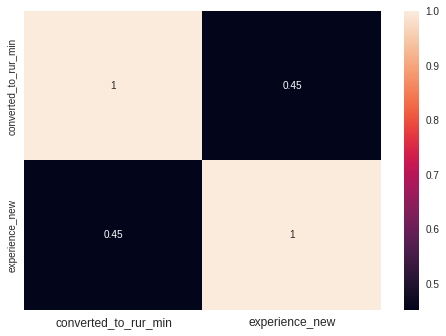

In [ ]:
num = ['converted_to_rur_min','experience_new']
hm = sns.heatmap(df_sk_l_top[num].corr(),annot=True)

построение таблицы сопряженности и на её основе  ХИ2 приводит к тому что  df_sk_l_top присваимается целое число. Что бы избежать проблем с использованием таблицы создадим для этого случая копию.  


In [ ]:
df_sk_l_top1 = df_sk_l_top

In [ ]:
wd=pd.crosstab(df_sk_l_top1['name'],df_sk_l_top1['key_skills_list']); wd

key_skills_list,1С программирование,1С: Управление Производственным Предприятием,Active Directory,Adobe Illustrator,Adobe Photoshop,Android,Atlassian Jira,BPMN,Bash,C#,...,MySQL,PHP,PostgreSQL,Python,REST,SQL,TCP/IP,UML,XML,Обновление конфигурации 1С
name,,,,,,,,,,,,,,,,,,,,,
android пргограммист,0,0,0,0,0,157,3,0,0,0,...,1,5,0,1,4,4,0,0,0,0
devops инженер,0,0,0,0,1,1,7,0,116,3,...,27,7,109,143,4,33,8,0,0,0
frontend-разработчик,0,0,0,1,4,1,11,0,1,2,...,20,14,3,2,6,7,0,0,2,0
ios разработчик,0,0,0,0,0,1,2,0,0,0,...,0,0,0,0,4,2,1,0,2,0
it-специалист,1,0,9,0,2,1,1,1,0,0,...,1,1,1,0,0,4,12,1,0,0
java-разработчик,0,0,0,0,1,1,6,0,2,0,...,13,0,81,1,15,87,0,12,12,0
php-программист,0,0,0,0,0,0,5,0,1,0,...,154,211,45,1,4,57,0,0,13,0
web-программист,1,0,0,1,8,0,2,0,1,8,...,110,151,12,10,3,33,0,0,7,0
аналитик,1,1,0,1,1,2,20,26,0,0,...,0,0,2,22,6,82,0,21,10,0


In [ ]:
chi2, prob, df_sk_l_top1, expected = scipy.stats.chi2_contingency(wd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df_sk_l_top1, prob))

test Statistics: 62627.36096471394
degrees of freedom: 812
p-value: 0.0



p-value: 0.0 следовательно НО отвергается и к вакансии требуются определенные знания(визуализация графическая есть также выше)

# Гипотеза:
НО заработная плата не зависит от опыта работы  
уровень значимости полагаем равным 0,05

в тетради по стажировке это задание идет практиче последним, наверное гипотезу надо было выдвигать сначала и проверять её, но тогда меньше бы использовалось различных методов, критериев и инструментов(знание и умение применять котрые планировалось проверить в этом задании)


Поэтому для проверки гипотезы уже практически все было сделано, кроме подтверждения и вывода. Что бы не смотреть разрозненую информацию по всему ноутбуку основную часть повторю еще раз.

структурированные данные находятся в  df_sk_l_topтип данных в нем:  

 name  -- категориальные  
 key_skills_list   -- категориальные  
 converted_to_rur_min --количественные  
 experience_new       -- порядковые  
 region             -- категориальные  
 хотя нам для этого нужны не все колонки, а только converted_to_rur_min и  experience_new

In [ ]:
df_sk_l_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15298 entries, 6 to 41959
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  15298 non-null  object 
 1   key_skills_list       15298 non-null  object 
 2   converted_to_rur_min  6278 non-null   float64
 3   experience_new        15298 non-null  int64  
 4   region                15298 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ MB


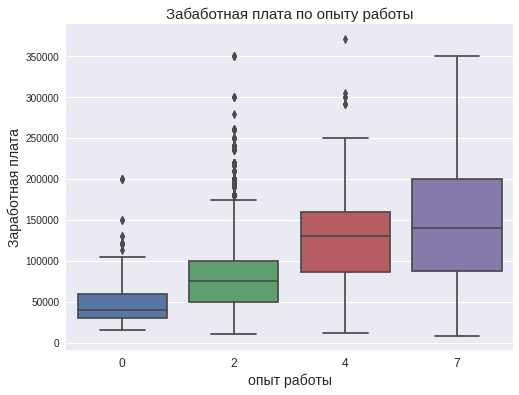

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplotboxplotboxplotboxplotboxplotboxplotboxplotboxplot(x='experience_new', y='converted_to_rur_min', data=df_sk_l_top)
ax.set_title('Забаботная плата по опыту работы')
#ax.set_yticks(x)
plt.ylabel('Заработная плата')
plt.xlabel('опыт работы')
plt.show()

In [ ]:
df_sk_l_top[['converted_to_rur_min','experience_new']].corr(method='pearson') # количественная корреляция Пирсона

,converted_to_rur_min,experience_new
converted_to_rur_min,1.000000,0.451932
experience_new,0.451932,1.000000


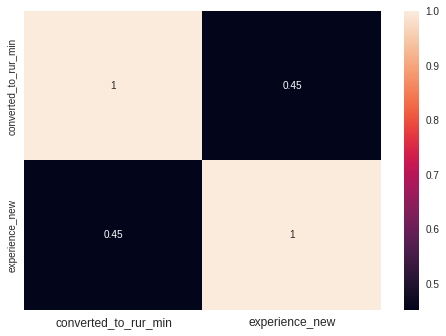

In [ ]:
num = ['converted_to_rur_min','experience_new']
hm = sns.heatmap(df_sk_l_top[num].corr(),annot=True)

корреляция составляет 0,45 - достаточно сильная связь. проверим НО еще по критерию краскала-уллиса

In [ ]:
df_e1=np.array(df_sk_l_top[df_sk_l_top['experience_new']==0]['converted_to_rur_min'])
df_e2=np.array(df_sk_l_top[df_sk_l_top['experience_new']==2]['converted_to_rur_min'])
df_e3=np.array(df_sk_l_top[df_sk_l_top['experience_new']==4]['converted_to_rur_min'])
df_e4=np.array(df_sk_l_top[df_sk_l_top['experience_new']==7]['converted_to_rur_min'])
stats.mstats.kruskalwallis(df_e1, df_e2, df_e3, df_e4)

KruskalResult(statistic=1429.0720778408338, pvalue=1.44781104529615e-309)

pvalue практически равно нулю, следовательно НО отвергается и зависимость значима.

# Выводы  

1. Наиболее востребованы претенденты с опытом работы 1-3 года и от 3-6 лет, достаточно мало "без опыта"( возможно стоит обратить внимание на практические курсы повышения квалификации)  
2. Самые востребованные вакансии
программист 1с, тестировщик, системный администратор, системный аналитик, devops инженер, программисты, графический дизайнер.  
3. Самые востребованные навыки SQL(и его диалекты), 1С программирование,      Linux, Git, JavaScript, Python, Java и другие языки программирования и графические редакторы.  

4. Самые востребованные вакансии и навыки не являются самыми высокоплачиваемыми.

выводы для "себя" по заданию(не знаю надо ли это проверяющим, так мне не до конца понятна задача задания)  

данные предоставленные заказчиком очень не качественные(не сравнить с тренировочными на кагле и в других подобных местах, где идет обучение на данных представленных в нужном виде).  
 а именно:
много вакансий не относящихся к сфере ИТ, формат данных, кодирование данных.
вакансии по названиям зачастую предпологают требования не тех навыков, одни и теже вакансии называются по разному, из - за отсутствия двоичного(категорийного -числового  кодирования) не все обрабатывается корректно.  

 Чтобы, еще сделал - разобрался с названиями вакансий и отнес их в правильные группы.(наверное можно автоматизировать частично по навыкам, но как не знаю).  

 Сделал бы выборку по ТОП и сравнил с общей(посмотреть на корреляцию), а то может быть в "обрезаной части" распределение совсем другое.  
  Посмотрел на вакансии и навыки отдельно по опыту работы - что требуется "сейчас" без опыта и что требуется "опытным" - тоже повышение квалификации.  
  После уточнения у заказчика что то детализировал, если это необходимо - например программистов по языкам отдельно или SQL по разновидностям.  
   
  Были еще какие то мысли, но сейчас не вспомню, а надо сдавать работу - цейтнот.  
  P.S. Прошу прощения за лирические отступления, понимаю, что в реальной работе для заказчика этого всего быть не должно. А только данные - гипотезы - проверки их и выводы.